In [27]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [19]:
connect = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [20]:
a = connect.cursor().execute('SELECT name from sqlite_master where type="table"')
print(a.fetchall())

[('pageviews',), ('checker',), ('deadlines',), ('datamart',), ('control',), ('test',)]


In [21]:
query = """ 
SELECT uid, COUNT(*) AS num_comits FROM checker
WHERE uid LIKE 'user_%' AND labname <> 'project1'
GROUP BY uid
"""
commits = pd.read_sql(query,connect)
commits

,uid,num_comits
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
5,user_13,52
6,user_14,61
7,user_15,23
8,user_16,41
9,user_17,51


In [23]:
query = """ 
SELECT uid, COUNT(*) AS num_views FROM pageviews
WHERE uid LIKE 'user_%'
GROUP BY uid
"""
num_views = pd.read_sql(query,connect)
num_views

,uid,num_views
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3
5,user_19,16
6,user_21,10
7,user_25,179
8,user_28,149
9,user_3,317


In [24]:
query=""" 
SELECT uid, CAST((JulianDay(test.first_commit_ts) - 
            JulianDay(DATETIME(deadlines.deadlines,'unixepoch'))
            ) * 24 AS Integer
            ) AS delta
FROM test LEFT JOIN deadlines ON test.labname=deadlines.labs
WHERE labname <> 'project1'
"""
delta = pd.read_sql(query,connect)
delta

,uid,delta
0,user_1,-6
1,user_1,-6
2,user_1,-28
3,user_1,-175
4,user_1,-107
5,user_10,-39
6,user_10,-39
7,user_10,-52
8,user_10,-132
9,user_10,-112


In [25]:
delta = delta.groupby(['uid']).mean()
delta

,delta
uid,
user_1,-64.400000
user_10,-74.800000
user_14,-159.000000
user_17,-61.600000
user_18,-5.666667
user_19,-98.750000
user_21,-95.500000
user_25,-92.600000
user_28,-86.400000


In [26]:
pivot_table = num_views.merge(commits,on=['uid'])
pivot_table = delta.merge(pivot_table,on=['uid'])
pivot_table = pivot_table.drop(columns=['uid'])
pivot_table

,delta,num_views,num_comits
0,-64.400000,28,62
1,-74.800000,89,20
2,-159.000000,143,61
3,-61.600000,47,51
4,-5.666667,3,5
5,-98.750000,16,118
6,-95.500000,10,65
7,-92.600000,179,79
8,-86.400000,149,60
9,-105.400000,317,18


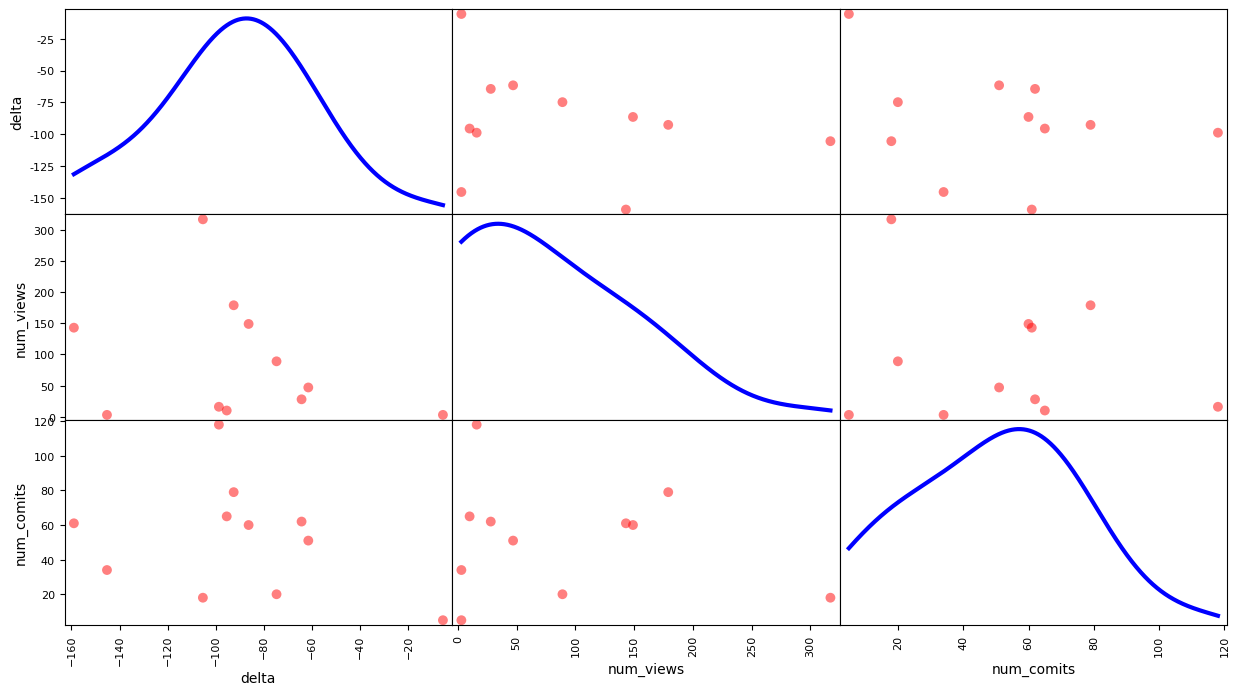

In [29]:
ax = scatter_matrix(pivot_table,
                    figsize=(15,8),
                    diagonal='kde',
                    density_kwds=dict(color='blue',linewidth=3),
                    s=200,
                    color='red')

In [18]:
connect.close()

Можем ли мы сказать, что если у пользователя мало просмотров страниц, то он, скорее всего, у вас мало коммитов?  

Нет  

Можем ли мы сказать, что если у пользователя мало просмотров страниц, небольшая средняя разница между первым коммитом и крайним сроком лаборатории?  

Нет  

Можем ли мы сказать, что есть много пользователей с небольшим количеством коммитов и мало с большим количеством коммитов?  

Можно сказать, что пользователей с небольшим количеством коммитов больше, чем с малым. Однако для вопроса много ли их, нужно понимать, какое значение мы примем за "много".  

Можем ли мы сказать, что есть много пользователей с небольшой средней разницей и несколько с большой средней разницей?  

Нет, но как и в предудыщем случае встает вопрос: какое значение мы примем за "много".